In [197]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [198]:
def monte_carlo_simulation(s, a, b, pity_s, guarantee, amount):
    char_result = []
    roll_to_limited_s = []
    rng_result = []
    # base probability
    total_gacha = s+a+b
    prob_s = s/total_gacha
    prob_a = a/total_gacha
    prob_b = b/total_gacha
    prob_guarantee_s = 0.5
    
    # hitung probabilitas kumulatif
    cum_prob_s = prob_s
    cum_prob_a = cum_prob_s + prob_a
    cum_prob_b = cum_prob_a + prob_b
    
    # track the amount of character
    count_standard_s = 0
    count_limited_s = 0
    count_a = 0
    count_b = 0
    
    # pity system
    pity_s = pity_s
    pity_a = 0
    # pity counter
    count_pity_s = 0
    count_pity_a = 0
    
    # check guarantee
    is_guarantee = guarantee
    
    # looping
    for i in range(amount):
        # random number
        roll = random.random()
        
        if pity_s >= 89:
            pity_s = 0
            pity_a = 0
            count_pity_s += 1
            if is_guarantee:
                count_limited_s += 1
                char_result.append('LS')
                roll_to_limited_s.append(i+1)
                is_guarantee = False
            else:
                if random.random() < prob_guarantee_s:
                    count_limited_s += 1
                    char_result.append('LS')
                    roll_to_limited_s.append(i+1)
                else:
                    count_standard_s += 1
                    char_result.append('S')
                    is_guarantee = True
        else:
            if roll < cum_prob_s:
                pity_s = 0
                pity_a = 0
                if is_guarantee:
                    count_limited_s += 1
                    char_result.append('LS')
                    roll_to_limited_s.append(i+1)
                    is_guarantee = False
                else:
                    if random.random() < prob_guarantee_s:
                        count_limited_s += 1
                        char_result.append('LS')
                        roll_to_limited_s.append(i+1)
                    else:
                        count_standard_s += 1
                        char_result.append('S')
                        is_guarantee = True
            elif roll < cum_prob_a:
                count_a += 1
                pity_s += 1
                pity_a = 0
                char_result.append('A')
            else:
                if pity_a >= 9:
                    count_a += 1
                    pity_s += 1
                    pity_a = 0
                    count_pity_a += 1
                    char_result.append('A')
                else:
                    count_b += 1
                    pity_s += 1
                    pity_a += 1
                    char_result.append('B')
        rng_result.append(roll)
    
    # summary
    print('Base Probabilty Karakter')
    print(f'probability S: {prob_s:.5f}\nprobability A: {prob_a:.5f}\nprobability B: {prob_b:.5f}')
    print(f'\nProbabilitas Kumulatif')
    print(f'Probabilitas S: {cum_prob_s:.5f}\nProbabilitas A: {cum_prob_a:.5f}\nProbabilitas B: {cum_prob_b:.5f}')
    
        
    
    return rng_result, char_result, roll_to_limited_s, count_limited_s, count_standard_s, count_a, count_b, count_pity_s, count_pity_a

## Input History Data

In [199]:
# Input gacha history
S_char = 5
A_char = 41
B_char = 255
# state awal
pity_awal = 11
guarantee = True
total_sim = 1000000

roll_cost = 160

#jika pity awal 90 maka reset jadi 0 jika melebihi 90 maka sisa dibagi 90
pity_awal = pity_awal if pity_awal < 90 else pity_awal%90
print(f'pity awal : {pity_awal}')

pity awal : 11


## Jalankan Simulasi

In [200]:
rng_result, char_result, roll_to_limited_s, count_limited_s, count_standart_s, count_a, count_b,amount_pity_s, amount_pity_a = monte_carlo_simulation(S_char, A_char, B_char, pity_awal, guarantee, total_sim)

Base Probabilty Karakter
probability S: 0.01661
probability A: 0.13621
probability B: 0.84718

Probabilitas Kumulatif
Probabilitas S: 0.01661
Probabilitas A: 0.15282
Probabilitas B: 1.00000


## Hasil Simulasi

In [201]:
#jumlah total karakter S
count_s = count_limited_s + count_standart_s
#probabilitas karakter
prob_limited_s = count_limited_s/total_sim
prob_s = count_s/total_sim
prob_a = count_a/total_sim
prob_b = count_b/total_sim

print(f'Hasil simulasi setelah {total_sim} kali pull')

print(f'\nJumlah karakter\n---------------------')
print(f'Limited S: {count_limited_s}')
print(f'S: {count_s}')
print(f'A: {count_a}')
print(f'B: {count_b}')

print(f'\nProbabilitas karakter \n---------------------')
print(f'Limited S: {prob_limited_s*100:.2f}%')
print(f'S: {prob_s*100:.2f}%')
print(f'A: {prob_a*100:.2f}%')
print(f'B: {prob_b*100:.2f}%')

Hasil simulasi setelah 1000000 kali pull

Jumlah karakter
---------------------
Limited S: 14193
S: 21321
A: 170025
B: 808654

Probabilitas karakter 
---------------------
Limited S: 1.42%
S: 2.13%
A: 17.00%
B: 80.87%


### Karakter S in General

In [202]:
# average pull needed (ditambah 1 karena index mulai dari 0)
rolls_to_get_s = [index + 1 for index, char in enumerate(char_result) if char == 'S' or char == 'LS']
print(f'Rolls at which character S was obtained: {rolls_to_get_s}')

first_roll = rolls_to_get_s[0]+pity_awal
interval_rolls_to_s = [first_roll] + [rolls_to_get_s[i] - rolls_to_get_s[i-1] for i in range(1, len(rolls_to_get_s))]

print(f'Rolls to get character S: {interval_rolls_to_s}')

print(f'\n\nSummary\n---------------------')
average_s = np.mean(interval_rolls_to_s)
print(f'Average rolls to get character S: {average_s:.1f} Pulls')
print(f'Average cost to get character S: {average_s*roll_cost:.1f} Polychromes')

#pull needed to get the character from pity awal
print(f'---------------------')
print(f'Pity awal : {pity_awal}')
pull_needed = average_s - pity_awal 
print(f'Pull needed to get the character based on pity awal : {pull_needed:.0f} Pulls')
print(f'Cost needed to get limited character S: {pull_needed*roll_cost:.0f} Polychromes')


print(f'\nPity\n---------------------')
print(f'Amount of pity S: {amount_pity_s}')
print(f'Probability of getting unlucky: {(amount_pity_s/total_sim)*100:.3f}%')

Rolls at which character S was obtained: [5, 83, 173, 229, 281, 317, 398, 401, 404, 440, 443, 495, 547, 637, 659, 749, 755, 823, 913, 980, 982, 1018, 1067, 1074, 1164, 1243, 1333, 1423, 1513, 1603, 1617, 1658, 1676, 1766, 1800, 1808, 1898, 1974, 1989, 2067, 2072, 2111, 2139, 2161, 2251, 2253, 2270, 2296, 2322, 2360, 2450, 2465, 2466, 2485, 2515, 2567, 2622, 2644, 2724, 2814, 2904, 2915, 2985, 3075, 3124, 3214, 3231, 3315, 3402, 3492, 3582, 3672, 3762, 3852, 3942, 4032, 4068, 4124, 4207, 4275, 4284, 4374, 4424, 4435, 4460, 4549, 4587, 4677, 4728, 4729, 4748, 4838, 4849, 4939, 4973, 5014, 5104, 5194, 5217, 5268, 5309, 5383, 5417, 5421, 5443, 5454, 5467, 5506, 5533, 5553, 5555, 5645, 5724, 5814, 5829, 5919, 5937, 5948, 6038, 6108, 6131, 6221, 6285, 6296, 6328, 6341, 6355, 6361, 6451, 6541, 6543, 6578, 6596, 6686, 6722, 6724, 6767, 6857, 6860, 6950, 7036, 7126, 7194, 7270, 7298, 7388, 7447, 7476, 7515, 7598, 7658, 7680, 7729, 7777, 7835, 7903, 7989, 8005, 8047, 8072, 8088, 8178, 8268, 8325

### Karakter Limited S

In [203]:
print(roll_to_limited_s)
#Check if got limited character S first
#Kalo gadapet limited duluan gaperlu ditambah dg pity awal
first_roll = roll_to_limited_s[0] if rolls_to_get_s[0]<roll_to_limited_s[0] else roll_to_limited_s[0] + pity_awal

interval_limited_s = [first_roll] + [roll_to_limited_s[i] - roll_to_limited_s[i-1] for i in range(1, len(roll_to_limited_s))]
print(f'\nRolls at which limited character S was obtained: \n{interval_limited_s}')

print(f'\n\nSummary\n---------------------')
average_limited_s = np.mean(interval_limited_s)
print(f'Average rolls to get limited character S: {average_limited_s:.1f} Pulls')
print(f'Average cost to get limited character S: {average_limited_s*roll_cost:.1f} Polychromes')

#pull needed to get the character from pity awal
print(f'---------------------')
print(f'Pity awal : {pity_awal}')
print(f'Pull needed to get the character based on pity awal : {average_limited_s - pity_awal:.0f} Pulls')
print(f'Cost needed to get limited character S: {(average_limited_s - pity_awal)*roll_cost:.0f} Polychromes')

#pity counter
amount_pity_limited_s = interval_limited_s.count(90)
print(f'\nPity\n---------------------')
print(f'Amount of pity S: {amount_pity_limited_s}')
print(f'Probability of getting unlucky {(amount_pity_limited_s/total_sim)*100:.3f}%')

[5, 173, 281, 398, 404, 440, 495, 637, 749, 823, 913, 982, 1067, 1164, 1333, 1423, 1603, 1617, 1676, 1766, 1808, 1974, 2067, 2072, 2139, 2161, 2253, 2296, 2322, 2450, 2466, 2515, 2567, 2622, 2724, 2814, 2904, 2985, 3075, 3214, 3315, 3492, 3672, 3852, 4032, 4124, 4207, 4284, 4424, 4435, 4549, 4677, 4728, 4748, 4838, 4939, 4973, 5014, 5194, 5268, 5383, 5417, 5443, 5467, 5506, 5533, 5555, 5645, 5724, 5814, 5829, 5919, 5937, 6038, 6108, 6221, 6296, 6341, 6361, 6541, 6543, 6578, 6686, 6722, 6724, 6857, 6950, 7126, 7194, 7270, 7388, 7447, 7515, 7658, 7680, 7777, 7903, 8005, 8047, 8088, 8178, 8325, 8349, 8372, 8462, 8476, 8521, 8560, 8627, 8654, 8747, 8892, 8979, 9023, 9104, 9178, 9268, 9420, 9486, 9499, 9658, 9748, 9775, 9955, 9967, 9989, 10130, 10228, 10255, 10363, 10396, 10422, 10512, 10583, 10673, 10763, 10842, 10888, 10950, 11004, 11059, 11079, 11178, 11255, 11273, 11280, 11370, 11391, 11481, 11627, 11670, 11686, 11724, 11816, 11847, 11937, 11950, 12035, 12168, 12264, 12361, 12495, 12517

## Tabel

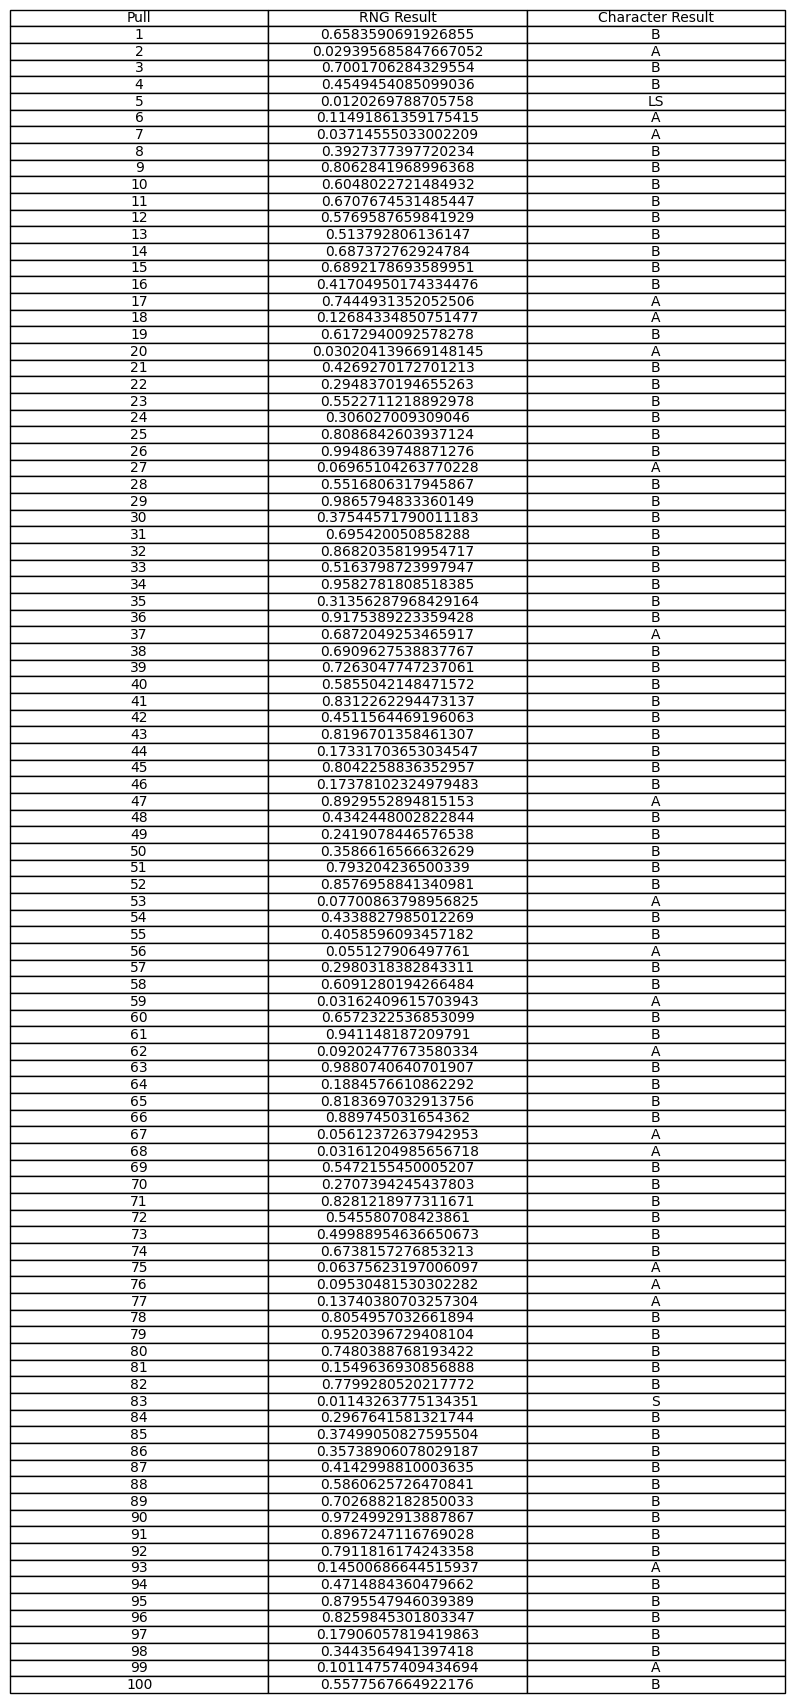

In [204]:
data = {
    'Pull': range(1, total_sim + 1),
    'RNG Result': rng_result,
    'Character Result': char_result
}

df = pd.DataFrame(data)

# Plot the table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.head(100).values, colLabels=df.columns, cellLoc='center', loc='center')

plt.show()